# Rappresentazione grafica del Teorema del Limite Centrale - caso simmetrico

- Il *TLC* (Teorema del Limite Centrale) afferma, in parole povere, che una combinazione lineare di *n* variabili casuali indipendenti ed identicamente distribuite (*n* dev'essere grande), ciascuna con media *mu* e varianza *sigma2*, converge ad una v.c. normale con media *mu* e varianza *sigma2/n*.
- Abbiamo visto che per una v.c. asimmetrica come la chi quadro la convergenza è lenta.
- Vedremo come funziona nel caso di v.c. uniformi nell'intervallo [0,1].
- Ricordiamo che una v.c. uniforme nell'intervallo [0,1] ha media 1/2 e varianza 1/12.
- **Steps**:
    
    - Generazione casuale di 1000 valori di una v.c. uniforme e rappresentazione tramite istogramma
    - Media tra un'altra v.c. uniforme e quella generata in precedenza
    - Ha tale combinazione lineare un aspetto già gaussiano?

In [1]:
%pylab inline

import pandas as pd
import seaborn as sb

Populating the interactive namespace from numpy and matplotlib


In [2]:
# impostare il seme casuale
np.random.seed(123)

### Campiono 1000 valori di una v.c. uniforme compresa tra 0 e 1

In [3]:
u_1 = pd.DataFrame(np.random.uniform(size=1000))

(array([  98.,   80.,  109.,  117.,  104.,  103.,  102.,   89.,   93.,  105.]),
 array([  8.18876137e-05,   9.99655394e-02,   1.99849191e-01,
          2.99732843e-01,   3.99616495e-01,   4.99500147e-01,
          5.99383799e-01,   6.99267450e-01,   7.99151102e-01,
          8.99034754e-01,   9.98918406e-01]),
 <a list of 10 Patch objects>)

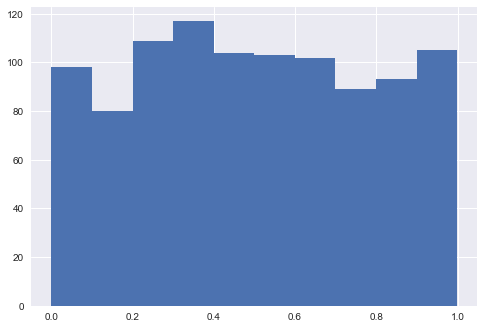

In [4]:
hist(u_1)

### Creo una funzione per generare altre uniformi tra 0 e 1 affiancandole per colonna alla precedente

In [5]:
def aggiungi_uniformi(x, n_rep):
    
    # numero di valori uguale alla lunghezza di X
    n_var = len(x.index)
    
    # fare n_rep iterazioni in ciascuna delle quali generare una uniforme
    for _ in range(n_rep):
        x_new = pd.DataFrame(np.random.uniform(size=n_var))
        x = pd.concat([x, x_new], axis = 1)
        
    # rinominare le colonne
    x.columns = range(n_rep + 1)
    
    return x

### Applico la funzione "aggiungi_uniformi" per generare un'altra v.c. uniforme

In [6]:
u_5 = aggiungi_uniformi(u_1, 4)
u_5

,0,1,2,3,4
0,0.696469,0.081894,0.423016,0.969426,0.158997
1,0.286139,0.495040,0.393018,0.721784,0.968783
2,0.226851,0.288890,0.036701,0.181892,0.609169
3,0.551315,0.639992,0.884020,0.882028,0.163754
4,0.719469,0.499936,0.676480,0.477022,0.804153
5,0.423106,0.036045,0.778257,0.846857,0.141166
6,0.980764,0.318634,0.665721,0.830908,0.270913
7,0.684830,0.489059,0.343000,0.017351,0.562950
8,0.480932,0.572204,0.506794,0.233662,0.152234
9,0.392118,0.104871,0.128745,0.911092,0.086774


### Calcolo le medie di riga del dataset (combinazione lineare delle 2 v.c. uniformi)

In [7]:
medie_5 = u_5.mean(axis = 1)

(array([   6.,   33.,   88.,  172.,  224.,  215.,  137.,   88.,   28.,    9.]),
 array([ 0.12539626,  0.20055514,  0.27571402,  0.3508729 ,  0.42603178,
         0.50119066,  0.57634953,  0.65150841,  0.72666729,  0.80182617,
         0.87698505]),
 <a list of 10 Patch objects>)

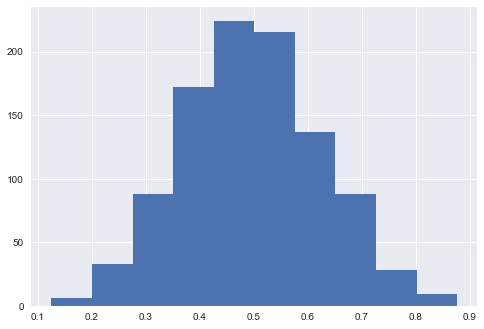

In [8]:
hist(medie_5)

**Una combinazione lineare di sole 5 v.c. è già ben approssimata da una gaussiana.** 

In [9]:
np.mean(medie_5), np.var(medie_5)

(0.4974633595204079, 0.016182123475877143)

La media è vicina a 0.5 e la varianza vicina ad 1/(12 * 5) = 0.0167.